In [1]:
import sys
import os

# Changing the parent path
src_path = os.path.abspath(os.path.join('..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)


from utils import *

## Loading the data

In [2]:
data = read_dataset()
data.head(4)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."


## Performing Data Cleaning Process

In [3]:
data = dataCleaning( data )
data.head()

Applying Text Processing and Data Cleaning!


,stars,text,cleaned_text,sentiment
0,5,"I tweaked it a little, removed onions because ...",tweak little remove onions onion haters house ...,1
1,5,Bush used to have a white chili bean and it ma...,bush use white chili bean make recipe super si...,1
2,5,I have a very complicated white chicken chili ...,complicate white chicken chili recipe make yea...,1
5,5,amazing! my boyfriend loved it so much! going ...,amaze boyfriend love much go make week,1
6,5,Wow!!! This recipe is excellent as written!! ...,wow recipe excellent write change make use oz ...,1


## Displaying Class Distribution

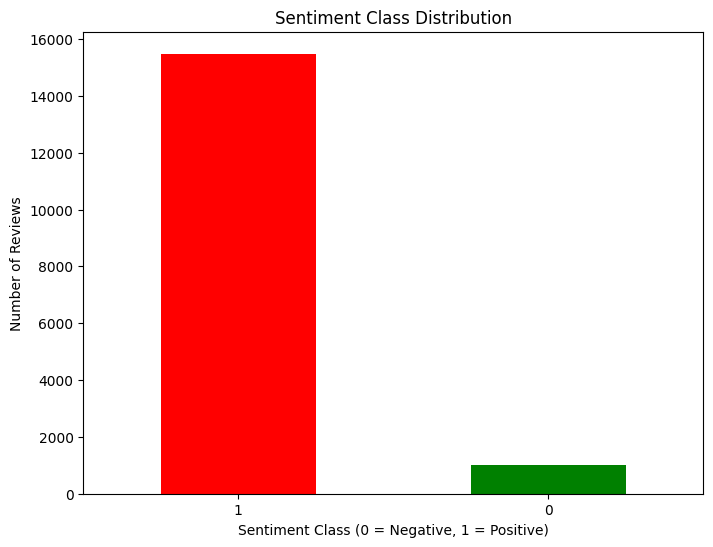

In [4]:
displayRatings( data['sentiment'] )

## Performing Data Preprocessing

In [5]:
XData = data['cleaned_text']
XLabels = data['sentiment']

X_train, X_test, y_train, y_test, tfidfVectorizer = tfidfVectorizationProcess( XData , XLabels )
xSmoteData, ySmoteData = adasynAlgo( X_train, y_train )

Shape After Vectorization! 
(11538, 4543) (4946, 4543) (11538,) (4946,)
Class distribution after ADASYN: Counter({1: 10848, 0: 10684})


## Running Machine Learning Models

In [6]:
logisticRegressionModel , lightGBMModel = runModels( xSmoteData, ySmoteData, X_test, y_test )

Mean F1-Score: 0.9346
Standard Deviation of F1-Score: 0.0027
 ** Model has Trained! ** 
***TESTING WEIGHTS:  {0: 3.0, 1: 2.0}
[LightGBM] [Info] Number of positive: 8678, number of negative: 8547
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 114784
[LightGBM] [Info] Number of data points in the train set: 17225, number of used features: 3000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.403656 -> initscore=-0.390254
[LightGBM] [Info] Start training from score -0.390254
[LightGBM] [Info] Number of positive: 8678, number of negative: 8547
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 115057
[LightGBM] [Info] Number of data points in the train set: 17225, number of used features: 2961
[LightGBM] [Info

** F1-Score on Test Data: 0.93 **

** Classification Report: **
              precision    recall  f1-score   support

           0       0.32      0.82      0.46       312
           1       0.99      0.88      0.93      4634

    accuracy                           0.88      4946
   macro avg       0.65      0.85      0.69      4946
weighted avg       0.94      0.88      0.90      4946


** Confusion Matrix **


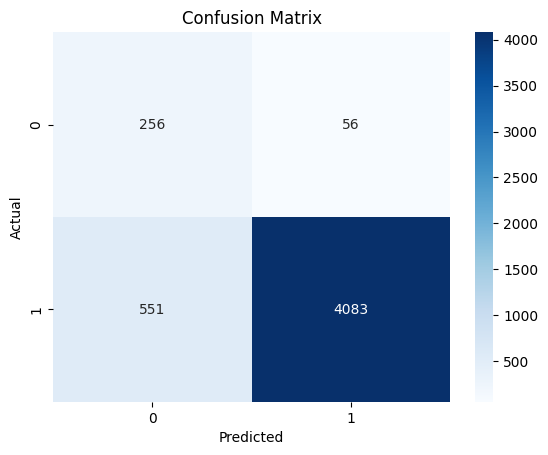

In [7]:
evaluateModel( logisticRegressionModel , X_test, y_test )

** F1-Score on Test Data: 0.94 **

** Classification Report: **
              precision    recall  f1-score   support

           0       0.33      0.69      0.45       312
           1       0.98      0.91      0.94      4634

    accuracy                           0.89      4946
   macro avg       0.66      0.80      0.69      4946
weighted avg       0.94      0.89      0.91      4946


** Confusion Matrix **


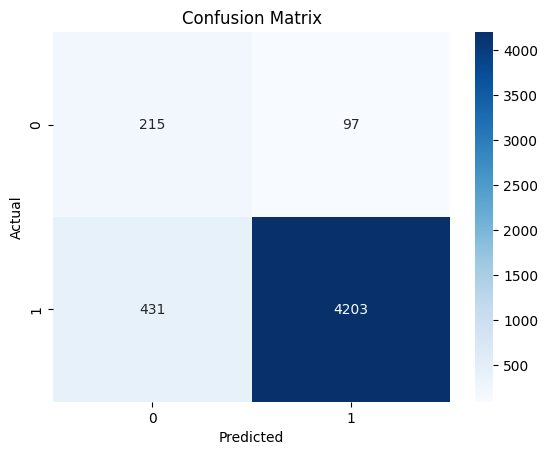

In [8]:
evaluateModel( lightGBMModel , X_test, y_test )

## Prediction on Sample Text

In [9]:

text = "I omitted the green chilis, and I loved it.  Added some cheese and oyster crackers to my bowl and was delicious.  I am going to make this again and again.  Finally a chicken chili recipe that I can use."
text = "CANT SEE THE ENTIRE RECIPE!:( :("
text = "Just made today! Delicious"
text = "Yum......thanks for posting"
text = "OOHHHHHHHHHHHHHHH MYYYYYYYYYYY  Five stars are not enough to express how yummy this dish is!  This smelled heavenly, and tasted even better!  We had roast chicken on Sunday and I used the leftover meat and rich broth.  I cut the recipe in half, since I only made one pie.  I didn&#39;t have peas, so substituted cut fresh asparagus for the &#39;green.&#39;  I also added garlic and bay leaves to the roux (removed before pouring into pie shell).   It reminded me of one of those high end chicken pies from the freezer section, but with less calories.  Thanks for the recipe Karen... it will definitely be a regular on our table!"
text = "Oh, absolutely loved this recipe! The way it turned my kitchen into a disaster zone was truly remarkable. The instructions were so vague that I felt like a contestant on a cooking show with no clue what to do next. And the flavor? Let's just say my taste buds are still recovering."
predictSentiment( text , tfidfVectorizer, lightGBMModel )


Predicted Label: Negavtive
Probability of Positive Class: [0.19383268]


## ** Naive baise - Not sure to include in the project

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Step 2: Initialize and Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(xSmoteData, ySmoteData)

# Step 3: Make Predictions
y_pred = nb_model.predict(X_test)

# Step 4: Evaluate Model Performance
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
cMap = confusion_matrix(y_test, y_pred)
sns.heatmap(cMap, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix')
plt.show()